# **Título del Proyecto**: Salarios en STEM

# **Tema**: Prediccion de Salarios en STEM

# **Información**
El siguiente dataset contiene 62.642 registros sobre educacion, compensasión (salario base, bonus, subvenciones de acciones), años de experiencia y demás información sobre empleados de las companias mas relevantes en el sector IT.<br>
El sitio levels.fyi es la fuente de la cual fue extraído el dataset. Su función es la de comparar y contrastar el nivel de las diferentes carreras en diferentes empresas, y generalmente, es considerada más precisa en términos de salarios en STEM reales en relación con otros sitios como glassdoor.com. Levels.fyi tiene una excelente interfaz y sus visualizaciones facilitan la comparación de rangos salariales entre empresas.

***
# **Obtención de Datos**
El dataset fue extraído de Kaggle: https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries

## Librerías y módulos


In [33]:
# Data Analysis
import pandas as pd
import numpy as np
import datetime

# Visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

# Para que me muestre los datos de las columnas completos y no salgan cortados
pd.options.display.max_colwidth = None  ## le indico que ancho de las columnas con None es para todos los caracteres posibles

## Carga del Dataset

In [34]:
ruta = '/Users/santi/Bootcamp/Salarios en STEM/src/data/raw/Levels_Fyi_Salary_Data.csv'
df = pd.read_csv(ruta)

In [35]:
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


***
# **Limpieza**

## Descripción del Dataset

In [36]:
# Visualizamos la dimension del dataset (filas, columnas)
df.shape

(62642, 29)

In [37]:
# Chequeamos la informacion basica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [38]:
# Chequeamos los tipos de datos y el n° de variables categoricas y numericas
df.dtypes.value_counts()

int64      13
object     10
float64     6
dtype: int64

In [39]:
# Visualizamos las estadisticas basicas de todas las columnas 
df.describe(include= "all")

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
count,62642,62637,62523,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,...,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,22427,30370
unique,62561,1631,2923,15,NaN,1050,NaN,NaN,3058,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,2/25/2020 13:25:07,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,Master's Degree
freq,3,8126,5014,41231,NaN,8701,NaN,NaN,11382,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11772,15391
mean,NaN,NaN,NaN,NaN,2.163004e+05,NaN,7.204135,2.702093,NaN,1.366873e+05,...,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039,NaN,NaN
std,NaN,NaN,NaN,NaN,1.380337e+05,NaN,5.840375,3.263656,NaN,6.136928e+04,...,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+04,NaN,0.000000,0.000000,NaN,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.350000e+05,NaN,3.000000,0.000000,NaN,1.080000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.880000e+05,NaN,6.000000,2.000000,NaN,1.400000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.640000e+05,NaN,10.000000,4.000000,NaN,1.700000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [40]:
# Observamos todas las columnas
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

A priori podemos eliminar las siguientes columnas:
* `dmaid` y `tag`: no hay información sobre lo que aportan y el significado de esta columnas.
* `rowNumber`: no es relevante el index
* `otherdetails`: aporta datos sobre Race, Title y Master que ya nos brindan otras columnas.
* `cityid`: no es relevante.
 

`totalyearlycompensation` vs [ `basesalary` , `stockgrantvalue` , `bonus` ]

Analizamos si `totalyearlycompensation` tiene correlación con [`basesalary`,`stockgrantvalue`,`bonus`] (si es asi, podemos eliminar estas 3)

In [41]:
# Analizamos si cumple `totalyearlycompensation` = `basesalary`+`stockgrantvalue`+`bonus`
(df['totalyearlycompensation']== df['basesalary']+df['stockgrantvalue']+df['bonus']).value_counts()

True     50198
False    12444
dtype: int64

In [42]:
print("El {}% cumple:`totalyearlycompensation` = `basesalary`+`stockgrantvalue`+`bonus` ".format(round((df['totalyearlycompensation']== df['basesalary']+df['stockgrantvalue']+df['bonus']).value_counts()[0]/len(df)*100)))
print("El {}% no cumple:`totalyearlycompensation` = `basesalary`+`stockgrantvalue`+`bonus` ".format(round((df['totalyearlycompensation']== df['basesalary']+df['stockgrantvalue']+df['bonus']).value_counts()[1]/len(df)*100)))

El 80% cumple:`totalyearlycompensation` = `basesalary`+`stockgrantvalue`+`bonus` 
El 20% no cumple:`totalyearlycompensation` = `basesalary`+`stockgrantvalue`+`bonus` 


* La razón por la cual no cumple 100% esa condición puede deberse a que los usuarios solo carguen el `totalyearlycompensation` e incluyan su salatio base, bonos y demas ganancias.  

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/720100007.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['totalyearlycompensation']].sort_values(by='totalyearlycompensation', ascending=False), vmin=-1, vmax=1, annot=True, cbar=False)


<AxesSubplot: title={'center': 'Correlación Totalyearlycompensation'}>

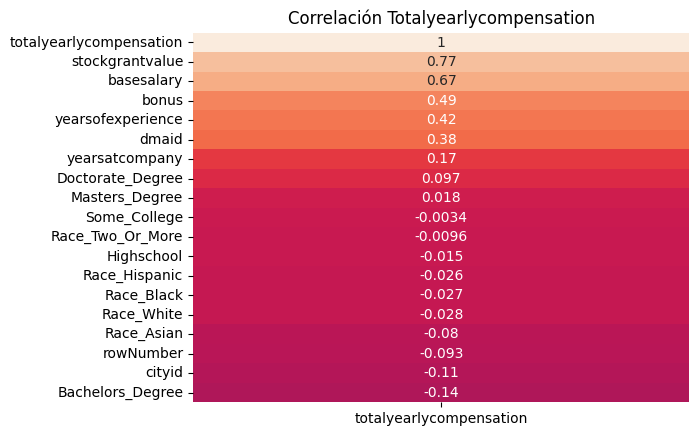

In [43]:
# Analizamos si hay correlacion
plt.title('Correlación Totalyearlycompensation')
sns.heatmap(df.corr()[['totalyearlycompensation']].sort_values(by='totalyearlycompensation', ascending=False), vmin=-1, vmax=1, annot=True, cbar=False)

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/1273792685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['basesalary']].sort_values(by='basesalary', ascending=False), vmin=-1, vmax=1, annot=True, cbar=False)


<AxesSubplot: title={'center': 'Correlación basesalary'}>

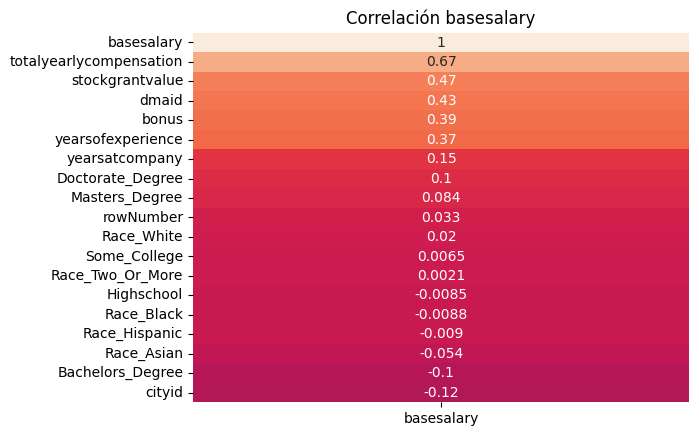

In [44]:
plt.title('Correlación basesalary')
sns.heatmap(df.corr()[['basesalary']].sort_values(by='basesalary', ascending=False), vmin=-1, vmax=1, annot=True, cbar=False)

In [45]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [46]:
# Nos quedamos con las siguientes columnas
df = df [['timestamp', 'company', 'level', 'title', 'totalyearlycompensation', 'basesalary',
       'stockgrantvalue', 'bonus','location', 'yearsofexperience', 'yearsatcompany', 'gender',
        'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']]


In [47]:
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,0.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,0.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN


## Valores Nulos

In [48]:
# Valores NA
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
basesalary                     0
stockgrantvalue                0
bonus                          0
location                       0
yearsofexperience              0
yearsatcompany                 0
gender                     19540
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [49]:
# Valores Nulos
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
basesalary                     0
stockgrantvalue                0
bonus                          0
location                       0
yearsofexperience              0
yearsatcompany                 0
gender                     19540
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [50]:
# Creamos una funcion para detectar y mostrar que columnas tienen valores nulos
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("El dataset contiene " + str(df.shape[1]) + " columnas y " + str(df.shape[0]) + " filas.\n"      
            "Hay " + str(mz_table.shape[0]) +
              " columnas con valores nulos/NaN. ")
        return mz_table

In [51]:
missing_zero_values_table(df)

El dataset contiene 24 columnas y 62642 filas.
Hay 5 columnas con valores nulos/NaN. 


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Race,0,40215,64.2,40215,64.2,object
Education,0,32272,51.5,32272,51.5,object
gender,0,19540,31.2,19540,31.2,object
level,0,119,0.2,119,0.2,object
company,0,5,0.0,5,0.0,object


In [52]:
cont=0
for i,f in df.iterrows():
    if type(f['gender'])==str:
        cont+=1
cont

43102

***
# **EDA, Visualización y Transformacion de los datos**

We analyze all variable one by one. So, we check null values, error and anything else about data, like `Data Analyisis`. Second step, is called `Data Cleansing` we prepare and manipulate for our machine learning modeling phase.

Resumed we have four stages:
1. EDA, check variables one bye one and transformation
2. impute null valus or transformation data
3. Visualization and check the patterns
4. Feature Engineering, next phases to create new attributes or transform other, like binarization, o discretization, standarization, rescaling.

All phases grouped by EDA, in the same way also called `Data Mining` or `Data Preparation` and `Data Manipulation`. 

The `Feature Engineering` stage is very important to check new data sources, aggregate new variables or to assign another significance at some variable.
***

## Descripción de las Variables
El dataset contiene 29 variables/características:<br>


Analizamos una por una cada Variable

In [53]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'location',
       'yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [54]:
df.describe(include='all')

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
count,62642,62637,62523,62642,6.264200e+04,6.264200e+04,6.264200e+04,62642.000000,62642,62642.000000,...,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,22427,30370
unique,62561,1631,2923,15,NaN,NaN,NaN,NaN,1050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,2/25/2020 13:25:07,Amazon,L4,Software Engineer,NaN,NaN,NaN,NaN,"Seattle, WA",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,Master's Degree
freq,3,8126,5014,41231,NaN,NaN,NaN,NaN,8701,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11772,15391
mean,NaN,NaN,NaN,NaN,2.163004e+05,1.366873e+05,5.148608e+04,19334.746588,NaN,7.204135,...,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039,NaN,NaN
std,NaN,NaN,NaN,NaN,1.380337e+05,6.136928e+04,8.187457e+04,26781.292040,NaN,5.840375,...,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.350000e+05,1.080000e+05,0.000000e+00,1000.000000,NaN,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.880000e+05,1.400000e+05,2.500000e+04,14000.000000,NaN,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.640000e+05,1.700000e+05,6.500000e+04,26000.000000,NaN,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


### `timestamp`
dia/mes/año de cuando fue realizada la carga del dato.<br>
* Podemos eliminar la hora ya que no es relevante.


In [55]:
# Analizamos desde que rango de fecha son los datos:
print(f'Inicio: {pd.to_datetime(df["timestamp"]).min()}')
print(f'Fin: {pd.to_datetime(df["timestamp"]).max()}')

Inicio: 2017-06-07 11:33:27
Fin: 2021-08-17 08:28:57


In [56]:
# Eliminamos la hora de timestamp
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2017-06,eBay,SE 2,Software Engineer,100000,0.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2017-06,Microsoft,60,Software Engineer,157000,0.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN


***
### `company`
* Tiene valores nulos

In [57]:
# Observamos los nulos
df[df['company'].isnull()]

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1403,2018-09,NaN,VP,Software Engineering Manager,292000,250000.0,0.0,42000.0,"Austin, TX",15.0,...,0,0,0,0,0,0,0,0,NaN,NaN
8579,2019-07,NaN,Mid-level,Software Engineer,85000,85000.0,0.0,8000.0,"Atlanta, GA",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
9045,2019-07,NaN,Junior,Software Engineer,47000,47000.0,0.0,0.0,"Melbourne, VI, Australia",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
26999,2020-08,NaN,Senior,Software Engineer,113000,113000.0,0.0,0.0,"Dublin, DN, Ireland",5.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
29433,2020-09,NaN,Mid Level,Software Engineer,54000,54000.0,0.0,0.0,"Arlington, VA",3.0,...,0,0,0,0,0,0,0,1,Hispanic,Bachelor's Degree


In [58]:
# Reemplazamos los valores NaN y por 'Unknown'
df['company'].replace(np.nan, 'Unknown', inplace=True)

In [59]:
# Check
df[df['company'].isnull()]

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


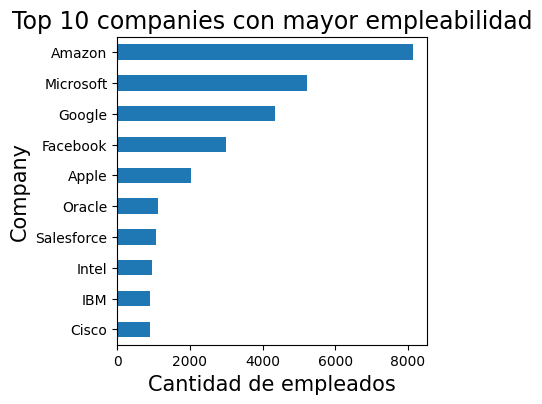

In [60]:
top_companies = df['company'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Top 10 companies con mayor empleabilidad', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('Company', size = 15)
plt.show();

In [61]:
df.company.value_counts().head(10)

Amazon        8126
Microsoft     5216
Google        4330
Facebook      2990
Apple         2028
Oracle        1128
Salesforce    1056
Intel          949
Cisco          907
IBM            907
Name: company, dtype: int64

***
### `level`
Variable Categórica: describe los niveles de cada trabajo
* Hay valores nulos los cuales los reemplazaremos como Unknown

In [62]:
# Observamos los nulos
df[df['level'].isnull()]

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1122,2018-09,Canonical,NaN,Software Engineer,151000,147000.0,0.0,4000.0,"Austin, TX",15.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2974,2018-11,investcloud,NaN,Software Engineer,145000,0.0,0.0,0.0,"Los Angeles, CA",3.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3107,2018-12,The New York Times Company,NaN,Software Engineer,123000,0.0,0.0,0.0,"New York, NY",4.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4283,2019-02,Netflix,NaN,Software Engineering Manager,615000,0.0,0.0,0.0,"Los Gatos, CA",15.0,...,0,0,0,0,0,0,0,0,NaN,NaN
10668,2019-09,American express,NaN,Data Scientist,155000,140000.0,0.0,15000.0,"New York, NY",3.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61628,2021-08,Quantiphi,NaN,Technical Program Manager,145000,135000.0,0.0,10000.0,"Houston, TX",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN
61790,2021-08,Cigna,NaN,Business Analyst,135000,120000.0,0.0,15000.0,"Austin, TX",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
61825,2021-08,Refinitiv,NaN,Product Manager,175000,145000.0,0.0,30000.0,"New York, NY",7.0,...,0,0,0,0,0,0,0,0,NaN,NaN
61891,2019-01,Dialpad,NaN,Software Engineer,140000,140000.0,0.0,0.0,"San Francisco, CA",4.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [63]:
# Reemplazamos los valores NaN y por 'Unknown'
df['level'].replace(np.nan, 'Unknown', inplace=True)

# Check
df[df['level'].isnull()]

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


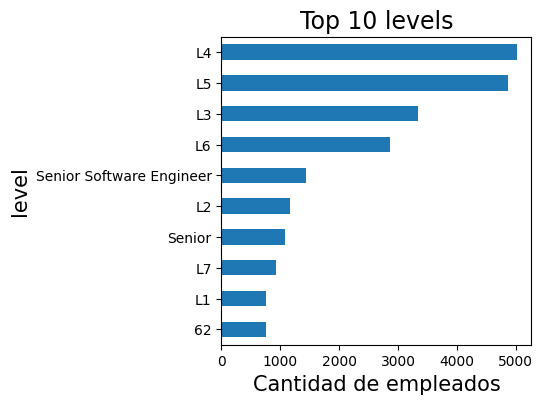

In [64]:
top_10_levels = df['level'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Top 10 levels', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('level', size = 15)
plt.show();

***
### `title`
Variable Categórica: describe los titulos/trabajos

In [65]:
# Observamos los unicos
df.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

Notamos que hay titulos que no corresponden a la rama de STEM o no forman parte del area de IT : Marketing, Mechanical Engineer, Sales, Recruiter y Human Resources


In [66]:
# Eliminamos los titulos que no corresponden a la rama STEM
titulos = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df = df[df['title'].apply(lambda x: x not in titulos)]

# Check
df.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Name: title, dtype: int64

In [67]:
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2017-06,eBay,SE 2,Software Engineer,100000,0.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2017-06,Microsoft,60,Software Engineer,157000,0.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,0,0,0,NaN,NaN


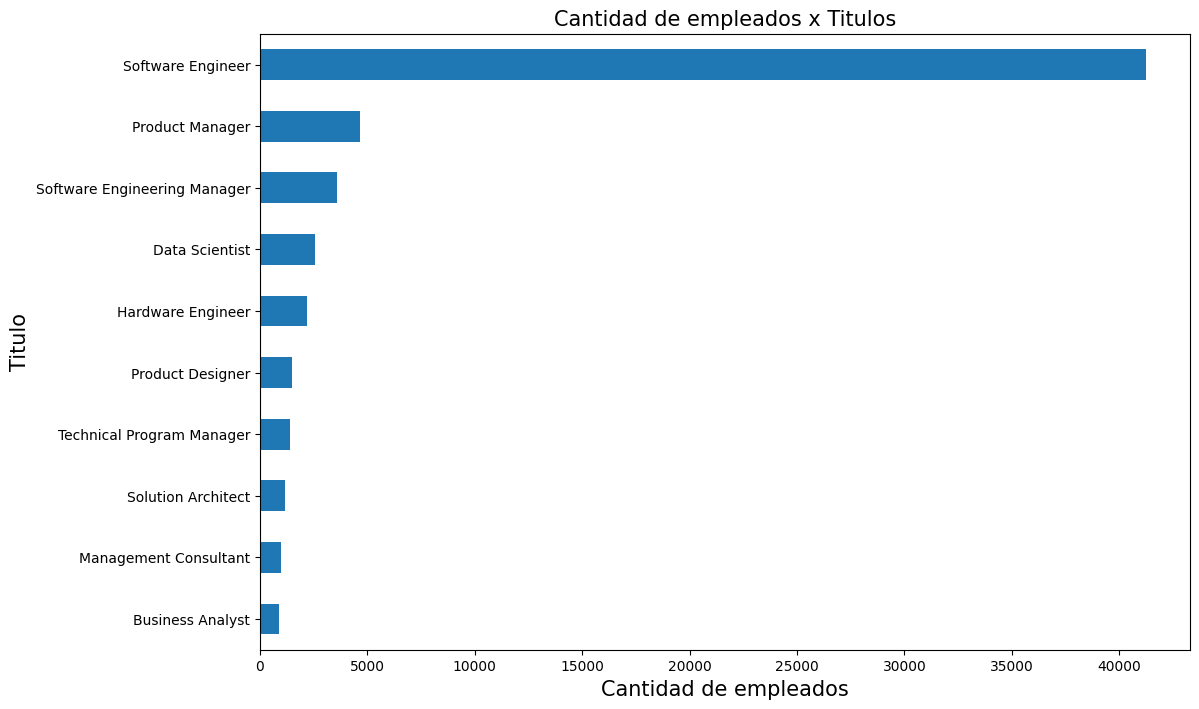

In [68]:
titles = df['title'].value_counts(ascending = True)
titles.plot.barh(figsize = (12,8))
plt.title("Cantidad de empleados x Titulos", size=15)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('Titulo', size = 15)
plt.show();

***
### `totalyearlycompensation`
Variable Discreta: describe el salario anual total = basesalary + stockgrantvalue + bonus (expresado en dolares americanos(USD)).
* Verificaremos Outliers

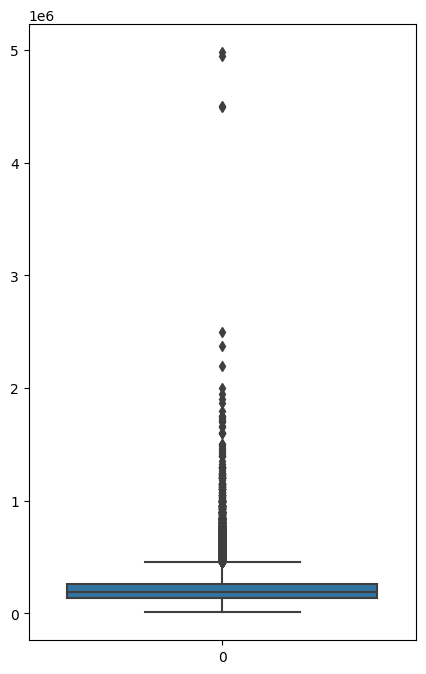

In [69]:
plt.figure(figsize= [5,8])
sns.boxplot(df['totalyearlycompensation'])
plt.show()

***
### `location`
Variable Categórica: describe la localizacion del trabajo.
* Tendríamos que analizar si conviene transformar la localizacion por paises o continente ya que esta por ciudad, y aquellas que son de EE.UU solo indica la ciudad.

In [70]:
df.location.value_counts()

Seattle, WA          8397
San Francisco, CA    6445
New York, NY         4366
Redmond, WA          2602
Mountain View, CA    2206
                     ... 
Sammamish, WA           1
Deerfield, IL           1
Oulu, OU, Finland       1
San Marcos, CA          1
Hilbert, WI             1
Name: location, Length: 1010, dtype: int64

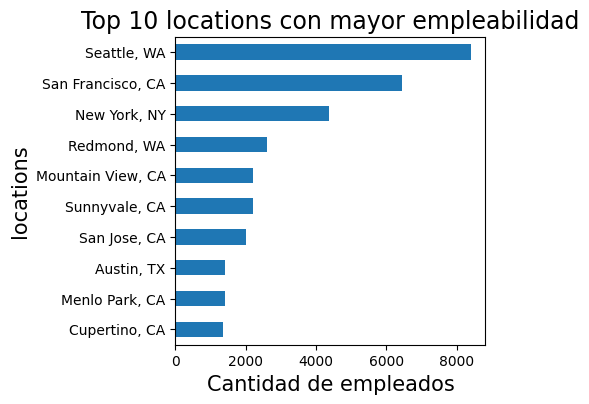

In [71]:
top_locations = df['location'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Top 10 locations con mayor empleabilidad', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('locations', size = 15)
plt.show();

> Se puede ver que EE.UU es el pais con mayor empleabilidad en trabajos STEM, ya que el top 10 de locations correponden todas a ciudades de dicho pais.

***
### `yearsofexperience`
Variable Numérica: describe los años de experiencia 

In [72]:
df.yearsofexperience.max()

69.0

In [73]:
df.yearsofexperience.min()

0.0

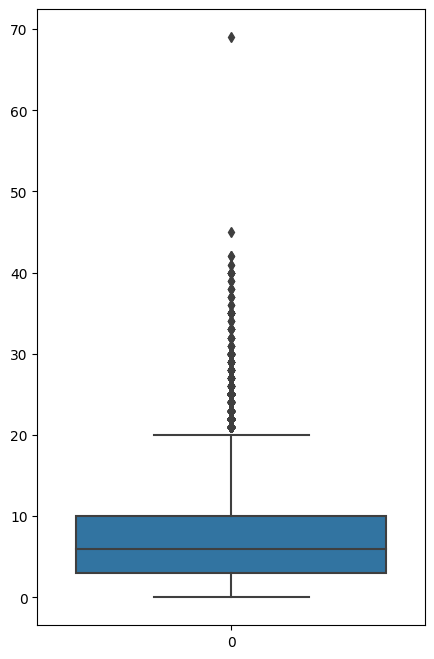

In [74]:
plt.figure(figsize= [5,8])
sns.boxplot(df['yearsofexperience'])
plt.show()

In [75]:
p_0 = np.percentile(df['yearsofexperience'], 0) #Q0 #Min
p_25 = np.percentile(df['yearsofexperience'], 25) #Q1
p_50 = np.percentile(df['yearsofexperience'], 50) #Q2 #Mediana
p_75 = np.percentile(df['yearsofexperience'], 75) #Q3
p_100 = np.percentile(df['yearsofexperience'], 100) #Q4 #Max
iqr = p_75-p_25
print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Rango intercuartilico:",iqr)

Valor del percentil 0: 0.0
Valor del percentil 25: 3.0
Valor del percentil 50: 6.0
Valor del percentil 75: 10.0
Valor del percentil 100: 69.0
Rango intercuartilico: 7.0


In [76]:
1.5*iqr

10.5

In [77]:
# Solo nos quedamos con los datos que cumplen 'yearsofexperience'<1.5*iqr
#df = df.loc[df['yearsofexperience']<20]
#df

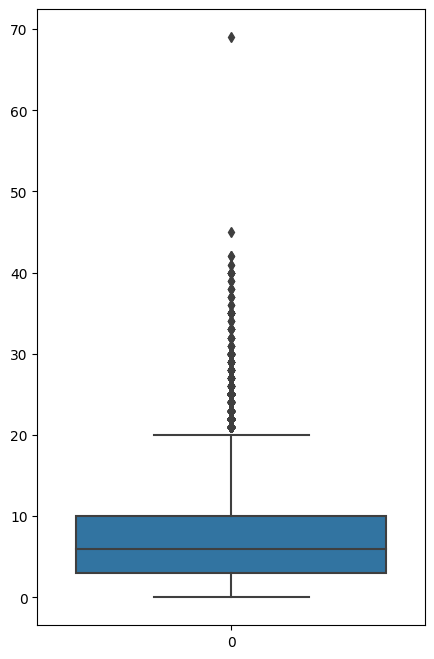

In [78]:
# Check de outliers
plt.figure(figsize= [5,8])
sns.boxplot(df['yearsofexperience'])
plt.show()

Observamos que ya no hay outliers

***
### `yearsatcompany`
Variable Numérica: describe los años en la compania realizando ese trabajo.

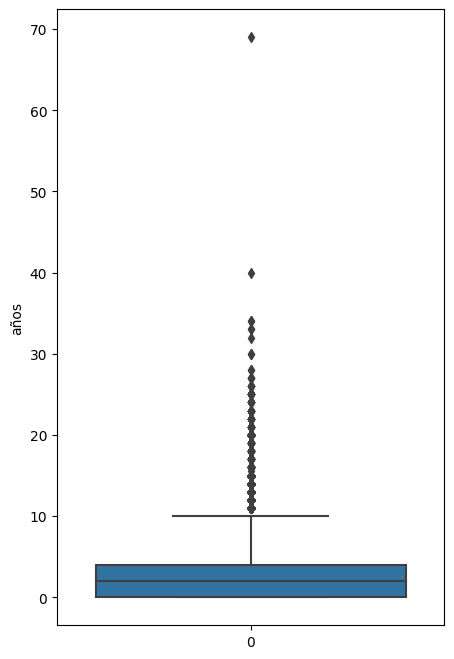

In [79]:
# Visualizacion de Outliers
plt.figure(figsize= [5,8])
sns.boxplot(df['yearsatcompany'])
plt.ylabel('años')
plt.show()

In [80]:
p_0 = np.percentile(df['yearsatcompany'], 0) #Q0 #Min
p_25 = np.percentile(df['yearsatcompany'], 25) #Q1
p_50 = np.percentile(df['yearsatcompany'], 50) #Q2 #Mediana
p_75 = np.percentile(df['yearsatcompany'], 75) #Q3
p_100 = np.percentile(df['yearsatcompany'], 100) #Q4 #Max
iqr = p_75-p_25
print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Rango intercuartilico:",iqr)

Valor del percentil 0: 0.0
Valor del percentil 25: 0.0
Valor del percentil 50: 2.0
Valor del percentil 75: 4.0
Valor del percentil 100: 69.0
Rango intercuartilico: 4.0


***
### `gender`
Variable Categórica: genero

In [81]:
df['gender'].unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

Reemplazamos los valores nan-Other y  'Title: Senior Software Engineer' por Unknown. El ultimo claramente es una errata

In [82]:
# Reemplazamos los valores con errata por nan
df['gender'].replace('Title: Senior Software Engineer', np.nan, inplace=True)
df['gender'].replace('Other', np.nan, inplace=True)
# Reemplazamos los valores nan y Other por 'Unknown'
df['gender'].replace(np.nan, 'Unknown', inplace=True)
# Check
df['gender'].unique()

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/3967331825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace('Title: Senior Software Engineer', np.nan, inplace=True)
/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/3967331825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace('Other', np.nan, inplace=True)
/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/3967331825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

array(['Unknown', 'Male', 'Female'], dtype=object)

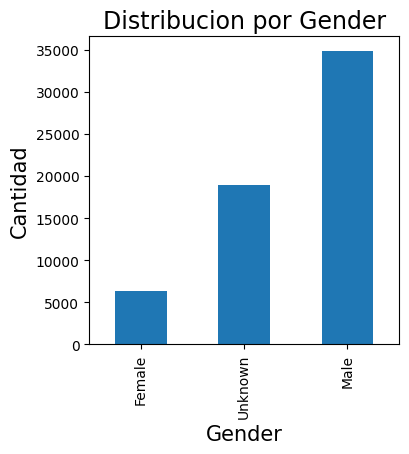

In [83]:
# Graficamos el gender por sus clases
gender = df['gender'].value_counts(ascending = True).plot.bar(figsize = (4,4));
plt.title('Distribucion por Gender', size=17)
plt.ylabel('Cantidad', size = 15)
plt.xlabel('Gender', size = 15)
plt.show();

***
### `Masters_Degree`
Variable Categórica: 0=no tiene un master degree y 1=si tiene

In [84]:
df.Masters_Degree.unique()

array([0, 1])

In [85]:
df.Masters_Degree.value_counts()

0    45325
1    14841
Name: Masters_Degree, dtype: int64

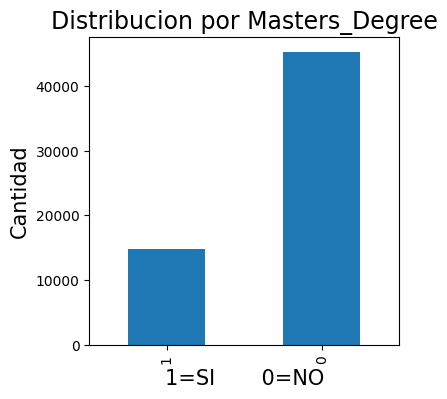

In [86]:
# Graficamos el Masters_Degree
gender = df['Masters_Degree'].value_counts(ascending = True).plot.bar(figsize = (4,4));
plt.title('Distribucion por Masters_Degree', size=17)
plt.ylabel('Cantidad', size = 15)
plt.xlabel('1=SI       0=NO', size = 15)
plt.show();

***
### `Bachelors_Degree`
Variable Categórica: 0=no tiene un bachelor degree y 1=si tiene

In [87]:
df.Bachelors_Degree.unique()

array([0, 1])

In [88]:
df.Bachelors_Degree.value_counts()

0    48375
1    11791
Name: Bachelors_Degree, dtype: int64

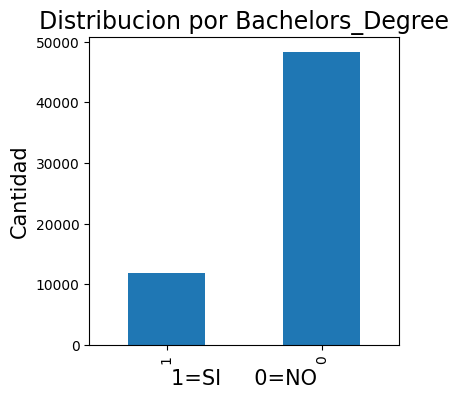

In [89]:
# Graficamos el Bachelors_Degree
gender = df['Bachelors_Degree'].value_counts(ascending = True).plot.bar(figsize = (4,4));
plt.title('Distribucion por Bachelors_Degree', size=17)
plt.ylabel('Cantidad', size = 15)
plt.xlabel('1=SI     0=NO', size = 15)
plt.show();

***
### `Doctorate_Degree`
Variable Categórica: 0=no tiene un doctorate degree y 1=si tiene

In [90]:
df.Doctorate_Degree.unique()

array([0, 1])

In [91]:
df.Doctorate_Degree.value_counts()

0    58404
1     1762
Name: Doctorate_Degree, dtype: int64

***
### `Highschool`
Variable Categórica: 0=no fue a Highschool  y 1=si fue

In [92]:
df.Highschool.unique()

array([0, 1])

In [93]:
df.Highschool.value_counts()

0    59865
1      301
Name: Highschool, dtype: int64

***
### `Some_College`


In [94]:
df.Some_College.unique()

array([0, 1])

In [95]:
df.Some_College.value_counts()

0    59835
1      331
Name: Some_College, dtype: int64

***
### `Race_Asian`

In [96]:
df.Race_Asian.unique()

array([0, 1])

***
### `Race_White`

In [97]:
df.Race_White.unique()

array([0, 1])

***
### `Race_Two_Or_More`

In [98]:
df.Race_Two_Or_More.unique()

array([0, 1])

***
### `Race_Black`

In [99]:
df.Race_Black.unique()

array([0, 1])

***
### `Race_Hispanic`

In [100]:
df.Race_Hispanic.unique()

array([0, 1])

***
### `Race`

* Hay valores nan

In [101]:
df.Race.unique()

array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [102]:
# Reemplazamos los nan por Unknown
df = df.fillna({'Race': 'Unknown'})

In [103]:
df.Race.value_counts()

Unknown        39006
Asian          11391
White           7392
Hispanic        1037
Two Or More      738
Black            602
Name: Race, dtype: int64

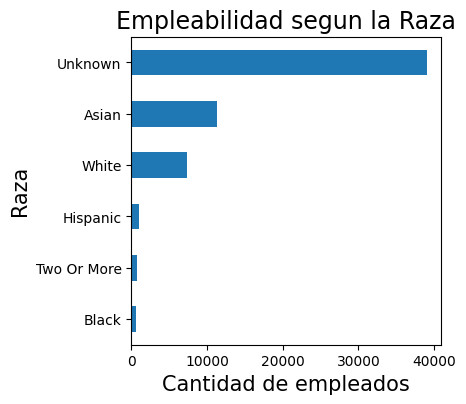

In [104]:
raza = df['Race'].value_counts(ascending = False).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Empleabilidad segun la Raza', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('Raza', size = 15)
plt.show();

***
### `Education`

* Hay valores nan

In [105]:
df.Education.unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [106]:
# Reemplazamos los nan por Unknown
df = df.fillna({'Education': 'Unknown'})

In [107]:
df.Education.unique()

array(['Unknown', 'PhD', "Master's Degree", "Bachelor's Degree",
       'Some College', 'Highschool'], dtype=object)

In [108]:
df.Education.value_counts()

Unknown              31244
Master's Degree      14841
Bachelor's Degree    11787
PhD                   1662
Some College           331
Highschool             301
Name: Education, dtype: int64

In [109]:
df['title'][df['Education']=='Unknown'].value_counts()

Software Engineer               22015
Product Manager                  2476
Software Engineering Manager     2043
Data Scientist                   1168
Hardware Engineer                 918
Product Designer                  735
Solution Architect                608
Technical Program Manager         542
Management Consultant             375
Business Analyst                  364
Name: title, dtype: int64

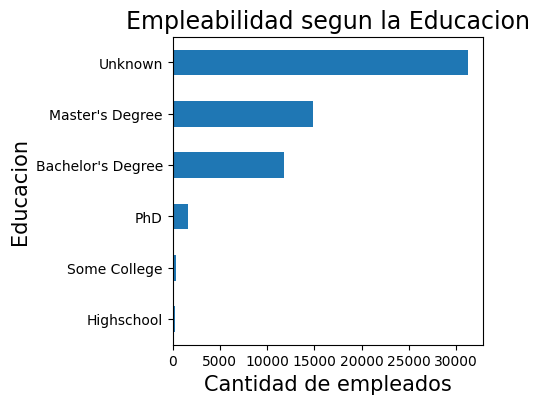

In [110]:
educacion = df['Education'].value_counts(ascending = False).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Empleabilidad segun la Educacion', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('Educacion', size = 15)
plt.show();

> Las siguientes columnas nos aportan la siguiente info sobre la Educacion: 
* `Highschool`--> Highschool 
* `Some_College`--> Some College
* `Doctorate_Degree`--> PhD
* `Bachelors_Degree`--> Bachelor's Degree
* `Masters_Degree`--> Master's Degree


### Matriz de Correlación

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/4003478092.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)


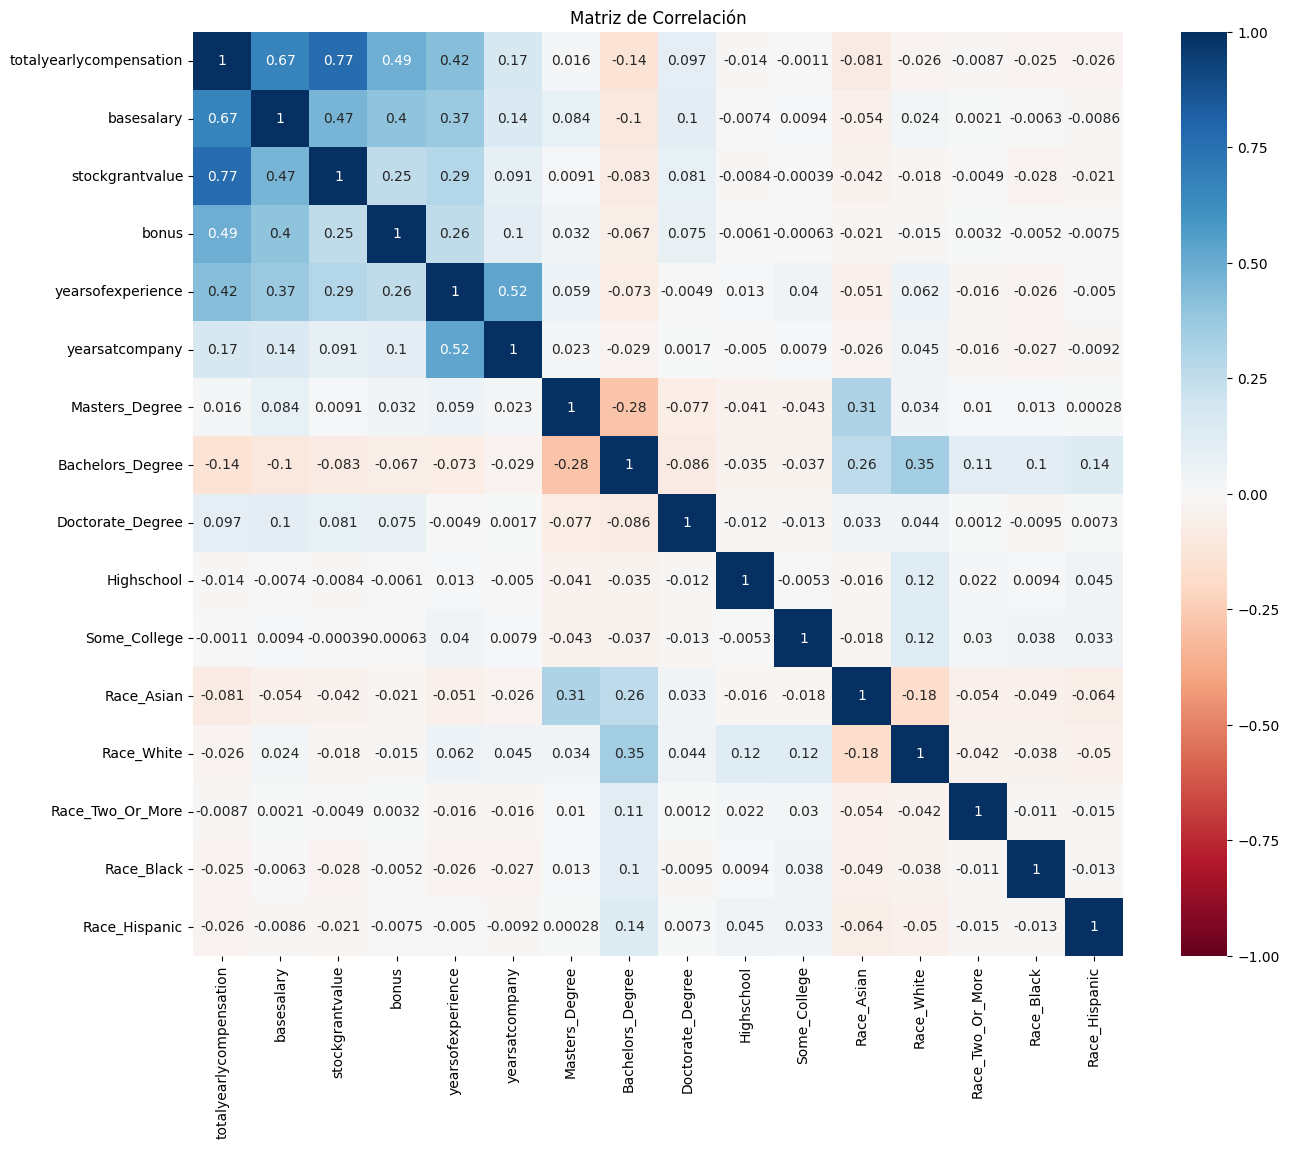

In [111]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

> Conclusiones de la Matriz de Correlacion:<br>
* Race_Asian tiene una alta correlacion positiva con Masters_Degree y Bachelors_Degree (+0.3): indica que esta raza tiende a tener muy buena educacion. 
* yearsofexperience alta correlacion positivas con totalyearlycompensation (+0.37): nos dice que los empleados por lo general no han cambiado de empresas.
*



***
### Transformación de los Datos

En esta parte nos centraremos en la creacion de nuevas columnas que nos aportaran una informacion mas clara

In [112]:
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,0,0,0,Unknown,Unknown
1,2017-06,eBay,SE 2,Software Engineer,100000,0.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
4,2017-06,Microsoft,60,Software Engineer,157000,0.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
62638,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
62639,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown
62640,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,0,0,0,Unknown,Unknown


In [113]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'location',
       'yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

`location`

La ubicacion de las companias no esta lo suficientemente clara, ya que nos indica en algunos casos solo la ciudad,ciudad+stado y en otros la ciudad+pais, es por eso que procedemos a crear columnas de:
* `city`
* `state`
* `country`

In [114]:
df['location'].unique()

array(['Redwood City, CA', 'San Francisco, CA', 'Seattle, WA', ...,
       'Pasir Ris, SG, Singapore', 'Richmond, VA, United States',
       'Hilbert, WI'], dtype=object)

In [115]:
# Creamos las columnas city-state-country
df[['city','state','country']] = df.location.str.split(", ",expand=True,n=2)
df


,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,Unknown,Unknown,Redwood City,CA,None
1,2017-06,eBay,SE 2,Software Engineer,100000,0.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,None
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,None
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,Unknown,Unknown,Sunnyvale,CA,None
4,2017-06,Microsoft,60,Software Engineer,157000,0.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,Mountain View,CA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,None
62638,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,Unknown,Unknown,Redmond,WA,None
62639,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,None
62640,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,None


Check de valores unicos para detectar missing values/erratas

In [116]:
df['country'].unique()

array([None, 'United Kingdom', 'Ireland', 'India', 'Belarus', 'Canada',
       'Russia', 'Netherlands', 'Switzerland', 'Singapore', 'Germany',
       'Japan', 'Sweden', 'Australia', 'United States', 'Israel',
       'Poland', 'China', 'Austria', 'Luxembourg', 'Czech Republic',
       'France', 'Pakistan', 'New Zealand', 'Denmark', 'Hong Kong (SAR)',
       'South Africa', 'Spain', 'United Arab Emirates', 'Hungary',
       'Brazil', 'Bulgaria', 'Philippines', 'Indonesia', 'Puerto Rico',
       'Taiwan', 'Romania', 'Mexico', 'Costa Rica', 'Marshall Islands',
       'Vietnam', 'Panama', 'Argentina', 'Norway', 'Moldova', 'Estonia',
       'Kenya', 'Turkey', 'Italy', 'Lithuania', 'Nigeria', 'Korea, South',
       'Ukraine', 'Jordan', 'Thailand', 'Colombia', 'Serbia', 'Portugal',
       'Guatemala', 'Yugoslavia', 'Uruguay', 'Slovakia', 'Bangladesh',
       'Finland', 'Chile', 'Malaysia', 'Latvia', 'Saudi Arabia', 'Peru',
       'Netherlands Antilles', 'Belgium', 'Ghana', 'Kazakhstan',
      

In [117]:
df['state'].unique()

array(['CA', 'WA', 'EN', 'NY', 'DN', 'MD', 'OR', 'KA', 'HM', 'DC', 'BC',
       'TX', 'MA', 'LA', 'PA', 'SC', 'MC', 'VA', 'CO', 'NE', 'IN', 'WI',
       'MN', 'NH', 'ZH', 'SG', 'IL', 'BE', 'TS', 'NJ', 'TY', 'ON', 'AZ',
       'ST', 'VI', 'SP', 'TA', 'MZ', 'OH', 'BY', 'BJ', 'NC', 'ZJ', 'MH',
       'KE', 'LU', 'FL', 'SH', 'GA', 'MO', 'PR', 'RI', 'HR', 'UT', 'NS',
       'IS', 'QC', 'undefined', 'AU', 'SK', 'MI', 'NO', 'HK', 'WC', 'CT',
       'DU', 'NM', 'PM', 'AR', 'VT', 'BU', 'IA', 'HA', 'SF', 'QL', 'KS',
       'DS', 'ID', 'LB', 'TN', 'JK', 'TP', 'DE', 'DL', 'AL', 'LD', 'BW',
       'AB', 'VD', 'HE', 'NW', 'JA', 'NV', 'HZ', 'JM', 'HN', 'LS', 'SU',
       'KY', 'GD', 'KL', 'CK', 'DF', 'Israel', 'OS', 'CE', 'NB', 'MP',
       'AP', 'NA', 'UP', 'IB', 'LO', 'VL', 'SA', 'WV', 'KG', 'KC', 'NI',
       'JS', 'CJ', 'AM', 'SJ', 'BM', 'OK', 'QE', 'CU', 'RH', 'SR', 'FR',
       'BS', 'LI', 'GU', 'VO', 'HH', 'GY', 'TR', 'BL', 'SN', 'AN', 'DA',
       'MG', 'MS', 'ES', 'ME', 'GE', 'LK', 'RM', 'KD

Observamos que states 'undefined' e 'Israel' hay que tratarlos

In [118]:
df[df['state']=='Israel']

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
9061,2019-07,PayPal,T22,Data Scientist,89000,0.0,0.0,0.0,"Tel Aviv, Israel",0.0,...,0,0,0,0,0,Unknown,Unknown,Tel Aviv,Israel,None
9075,2019-07,JPMorgan Chase,Associate,Software Engineer,120000,120000.0,0.0,10000.0,"Tel Aviv, Israel",15.0,...,0,0,0,0,0,Unknown,Unknown,Tel Aviv,Israel,None


Figura en state pero debería ser en country, procedemos a realizar el cambio

In [119]:
df['country'][df['state']=='Israel'] = 'Israel'

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_53524/3568170266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'][df['state']=='Israel'] = 'Israel'


In [120]:
# Check del cambio
df[df['state']=='Israel']

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
9061,2019-07,PayPal,T22,Data Scientist,89000,0.0,0.0,0.0,"Tel Aviv, Israel",0.0,...,0,0,0,0,0,Unknown,Unknown,Tel Aviv,Israel,Israel
9075,2019-07,JPMorgan Chase,Associate,Software Engineer,120000,120000.0,0.0,10000.0,"Tel Aviv, Israel",15.0,...,0,0,0,0,0,Unknown,Unknown,Tel Aviv,Israel,Israel


In [121]:
df[df['state']=='undefined']

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
2336,2018-10,Freshworks,Staff Software Engineer (IC4),Software Engineer,100000,65000.0,35000.0,0.0,"Chennai, undefined, India",12.0,...,0,0,0,0,0,Unknown,Unknown,Chennai,undefined,India
2464,2018-11,Citi,Assistant vice president,Software Engineer,28000,0.0,0.0,0.0,"Chennai, undefined, India",7.0,...,0,0,0,0,0,Unknown,Unknown,Chennai,undefined,India
3602,2019-01,PayPal,T24,Software Engineer,30000,20000.0,5000.0,5000.0,"Chennai, undefined, India",4.0,...,0,0,0,0,0,Unknown,Unknown,Chennai,undefined,India
9224,2019-07,AthenaHealth,L2,Software Engineer,23000,12000.0,0.0,1000.0,"Chennai, undefined, India",8.0,...,0,0,0,0,0,Unknown,Unknown,Chennai,undefined,India


En este caso, no realizamos nada con los que son 'undefined' ya que solo nos interesa que figure el pais en country.

In [122]:
# Filtramos las ciudades que tienen valor nulo en la columna pais
df['city'][df['country'].isnull()].unique()

array(['Redwood City', 'San Francisco', 'Seattle', 'Sunnyvale',
       'Mountain View', 'Redmond', 'Bellevue', 'Menlo Park', 'Cupertino',
       'New York', 'Los Gatos', 'Baltimore', 'Sacramento', 'Hillsboro',
       'Aliso Viejo', 'San Jose', 'Palo Alto', 'Kirkland', 'Washington',
       'Austin', 'Boston', 'San Diego', 'New Orleans', 'Santa Clara',
       'Irvine', 'Pittsburgh', 'San Ramon', 'Los Angeles', 'Folsom',
       'Charleston', 'Culver City', 'Mc Lean', 'Portland', 'Boulder',
       'Pleasanton', 'Fremont', 'Beaverton', 'Omaha', 'Waltham',
       'Philadelphia', 'Indianapolis', 'Milwaukee', 'Minneapolis',
       'Chicago', 'Herndon', 'Denver', 'Albany', 'Hoboken', 'Newark',
       'Chandler', 'Colorado Springs', 'Costa Mesa', 'San Bruno',
       'San Mateo', 'Plano', 'Richmond', 'Phoenix', 'Dallas',
       'Round Rock', 'Oakland', 'Madison', 'Bedford', 'Broomfield',
       'Harrisburg', 'Cincinnati', 'Jersey City', 'Durham', 'Burlington',
       'Raleigh', 'Fort Lauderdale',

> Todas las ciudades que tienen valores nulos de country corresponden a ciudades de Estados Unidos.<br>

Procedemos a imputarlas todas a Estados Unidos

In [123]:
df.country.fillna('United States',inplace=True)

In [124]:
# Check
df['city'][df['country'].isnull()].unique()

array([], dtype=object)

Visualizamos cuales son los paises que mas empleabilidad tienen

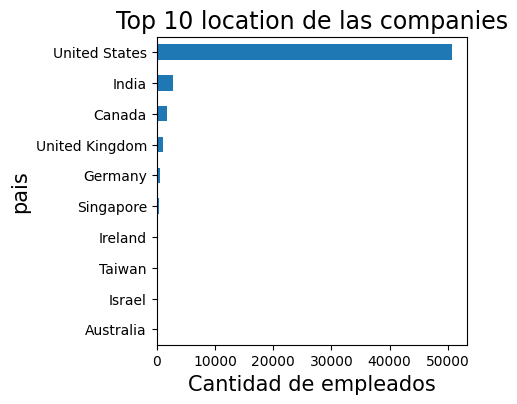

In [125]:
top_10_country = df['country'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Top 10 location de las companies', size=17)
plt.xlabel('Cantidad de empleados', size = 15)
plt.ylabel('pais', size = 15)
plt.show();

In [126]:
# Companias por Pais
companias_x_pais= df['country'].value_counts(ascending = False).sort_values(ascending = False)
companias_x_pais

United States     50699
India              2791
Canada             1754
United Kingdom     1148
Germany             551
                  ...  
Yugoslavia            1
Guatemala             1
Panama                1
Pakistan              1
Egypt                 1
Name: country, Length: 76, dtype: int64

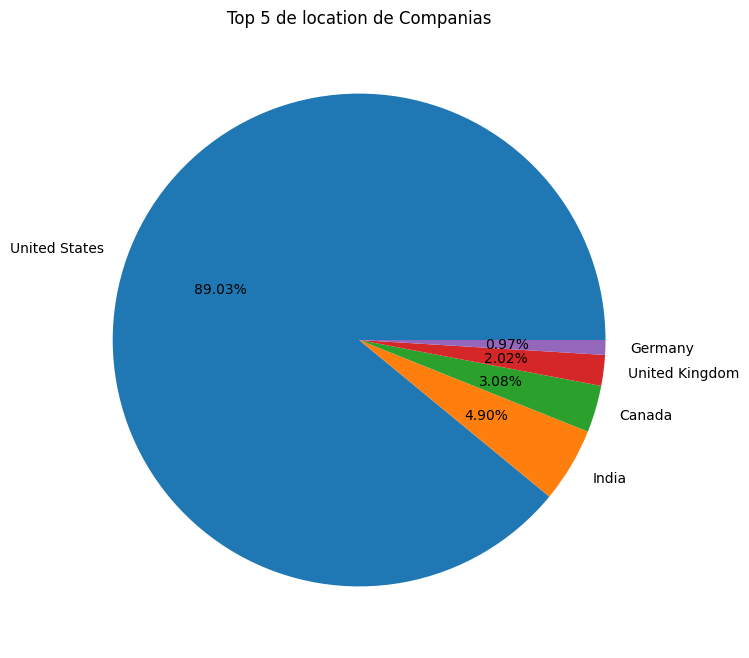

In [127]:
# Visualizamos solo los top 5 de companias_x_pais
plt.figure(figsize=(8,8))
plt.title('Top 5 de location de Companias')
plt.pie(df['country'].value_counts(ascending = False).head(5).values,labels=df['country'].value_counts(ascending = False).head(5).index,autopct='%1.2f%%')
p=plt.gcf();

> Estados Unidos es el pais que mas empleabilidad tiene (88,73%), es decir, practicamente casi todas las companias estan ubicadas en EE.UU. Este punto es importante ya que a la hora de realizar las predicciones sobre los salarios podriamos solo centrarnos en este pais debido al gran numero de registros con los que contamos.

> A priori era de esperarse ya que las empresas mas importantes de IT (FAANG) se encuentran en EE.UU.

`states`

Realizamos un analisis sobre los States 

In [129]:
df['state'][df['country']=='United States'].nunique()

49

> Estados Unidos cuenta con 50 Estados, en este dataset contamos con informacion sobre 49.

In [136]:
df['state'][df['country']=='United States'].value_counts(ascending = False)

CA    21900
WA    11963
NY     4509
TX     2543
MA     1674
VA      896
IL      833
OR      599
CO      575
DC      562
GA      544
NC      480
PA      459
NJ      439
AZ      364
FL      278
MN      271
UT      216
MI      200
OH      190
MO      184
WI      154
MD      100
CT       96
IN       87
AR       87
TN       75
DE       56
ID       43
KS       34
NH       34
IA       29
LA       29
NE       25
AL       25
KY       23
NV       21
SC       21
OK       17
RI       16
NM       10
WV        9
VT        7
MT        7
ME        4
HI        4
MS        3
ND        3
WY        1
Name: state, dtype: int64

In [ ]:
df = df[(df['country']=='United States')]
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,Unknown,Unknown,Redwood City,CA,United States
1,2017-06,eBay,SE 2,Software Engineer,100000,100000.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,Unknown,Unknown,Sunnyvale,CA,United States
4,2017-06,Microsoft,60,Software Engineer,157000,157000.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,Mountain View,CA,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
62638,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,Unknown,Unknown,Redmond,WA,United States
62639,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
62640,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States


In [ ]:
df.city.nunique()

630

Corroboramos que no hay Valores Nulos

In [ ]:
# Check de nulos
missing_zero_values_table(df)

El dataset contiene 27 columnas y 50699 filas.
Hay 0 columnas con valores nulos/NaN. 


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Matriz de Correlacion

/var/folders/vp/gybt8p_13qvf3z9x1s4wr4d40000gn/T/ipykernel_41448/691702542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)


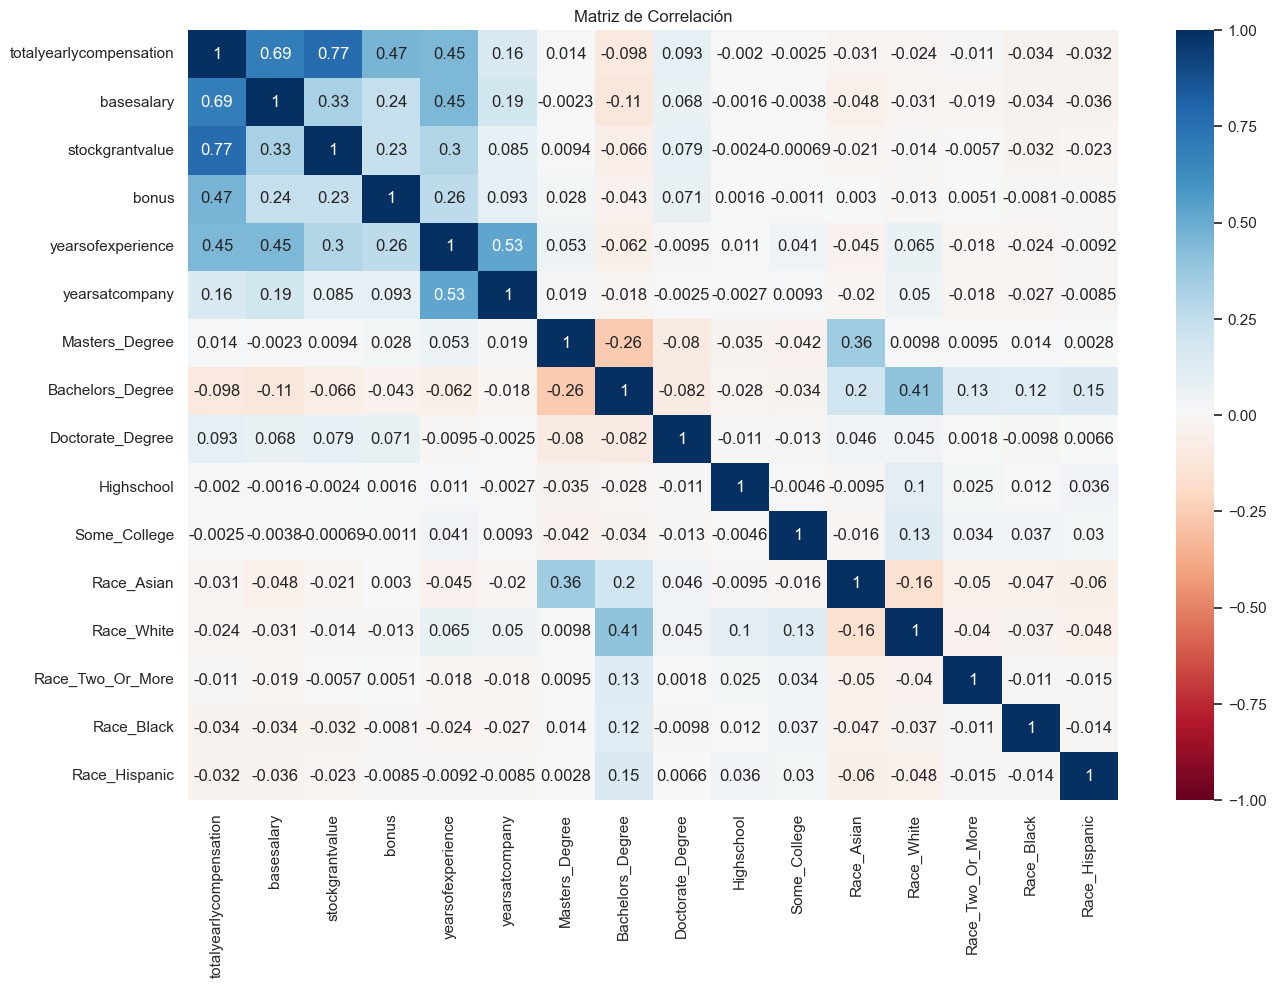

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Guardamos en archivo.csv el **data_procesado**

In [ ]:
# Renombramos el df --> data_procesado
data_procesado = df
data_procesado.to_csv('/Users/santi/Bootcamp/Salarios en STEM/src/data/processed/data_procesado.csv', index=False)

In [ ]:
data_procesado.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'location',
       'yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Race', 'Education', 'city', 'state', 'country'],
      dtype='object')

In [ ]:
data_procesado[['company', 'level', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'location',
       'yearsofexperience', 'yearsatcompany']]

,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,yearsatcompany
0,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,1.5
1,eBay,SE 2,Software Engineer,100000,100000.0,0.0,0.0,"San Francisco, CA",5.0,3.0
2,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,0.0
3,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,5.0
4,Microsoft,60,Software Engineer,157000,157000.0,0.0,0.0,"Mountain View, CA",5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
62637,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,1.0
62638,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,2.0
62639,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,12.0
62640,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,4.0


In [ ]:
data_procesado.shape

(50699, 27)

***